<center><font size=4 style="color:#BA4A00"><strong>文本统计量和文本向量化</strong></font></center>

### 使用spaCy处理中文新闻原始语料

# !python -m spacy download zh_core_web_sm

In [12]:
import _locale
_locale._getdefaultlocale = (lambda *args: ['zh_CN', 'utf8'])

In [1]:
import spacy
from spacy.lang.zh.examples import sentences 

nlp = spacy.load("zh_core_web_sm")

In [7]:
data_dir = './cn_news/'

In [8]:
# from utils.fileUtils import *
# tt = readStrFromFile('./cn_news/Finance/100.txt')

In [73]:
f_list = []

In [74]:
with open('./cn_news/Finance/271.txt',encoding='gbk') as f:
    t = f.read()

In [75]:
paragraphs = t.strip().split('\n')

In [77]:
paragraphs = t.strip().split('\n')
for paragraph in paragraphs:
    if paragraph.strip():
        p_list = []
        doc = nlp(paragraph)
        for sent in doc.sents:
            t_list = []
            for token in sent:
                if token.pos_ != 'SPACE':
                    t_list.append(token.text+'/'+token.pos_)
            p_list.append(' '.join(t_list))
        f_list.append('\n'.join(p_list))

In [78]:
with open('./tdemo.txt','w') as f:
    f.write('\n\n'.join(f_list))

In [31]:
doc = nlp(paragraphs[5])

In [ ]:
for sent in doc.sents:
    for token in sent:
        print(token.text,token.pos_)
    print('------')

In [24]:
paragraphs[2]

'权威内参'

In [33]:
token.pos_

'PUNCT'

In [47]:
from nltk.corpus.reader import TaggedCorpusReader

In [64]:
reader = TaggedCorpusReader('./ddata/', '.*')

In [65]:
reader.fileids()

['finance/112.txt',
 'finance/113.txt',
 'finance/114.txt',
 'finance/24.txt',
 'finance/28.txt',
 'movie/24.txt',
 'movie/28.txt',
 'sport/113.txt',
 'sport/114.txt',
 'sport/24.txt']

In [66]:
reader.sents()

[['期货', '市场', '已', '成', '金融', '政策', '变化', '风向标'], ['', '货币', '等', '宏观', '经济', '政策', '都', '存在', '4－6', '个', '月', '的', '时', '滞期', '，', '而', '期货', '市场', '正好', '能够', '抵消', '这种', '滞后'], ...]

In [67]:
reader.tagged_words()

[('期货', 'NOUN'), ('市场', 'NOUN'), ('已', 'ADV'), ...]

In [6]:
from nltk.corpus.reader import CategorizedTaggedCorpusReader

In [7]:
creader = CategorizedTaggedCorpusReader('./ddata/', '.*',cat_pattern = r'(.+)/.+txt')

In [8]:
creader.categories()

['finance', 'movie', 'sport']

In [22]:
creader.fileids()

['finance/78.txt',
 'finance/80.txt',
 'finance/81.txt',
 'finance/84.txt',
 'finance/85.txt',
 'finance/86.txt',
 'finance/89.txt',
 'movie/102.txt',
 'movie/24.txt',
 'movie/28.txt',
 'movie/90.txt',
 'movie/91.txt',
 'movie/92.txt',
 'movie/93.txt',
 'movie/96.txt',
 'movie/98.txt',
 'sport/10.txt',
 'sport/13.txt',
 'sport/14.txt',
 'sport/16.txt',
 'sport/17.txt',
 'sport/19.txt',
 'sport/21.txt']

In [70]:
creader.tagged_words()

[('期货', 'NOUN'), ('市场', 'NOUN'), ('已', 'ADV'), ...]

In [72]:
creader.tagged_sents()

[[('期货', 'NOUN'), ('市场', 'NOUN'), ('已', 'ADV'), ('成', 'VERB'), ('金融', 'NOUN'), ('政策', 'NOUN'), ('变化', 'NOUN'), ('风向标', 'NOUN')], [('', 'SPACE'), ('货币', 'NOUN'), ('等', 'PART'), ('宏观', 'ADJ'), ('经济', 'NOUN'), ('政策', 'NOUN'), ('都', 'ADV'), ('存在', 'VERB'), ('4－6', 'NUM'), ('个', 'NUM'), ('月', 'NOUN'), ('的', 'PART'), ('时', 'PART'), ('滞期', 'VERB'), ('，', 'PUNCT'), ('而', 'ADV'), ('期货', 'NOUN'), ('市场', 'NOUN'), ('正好', 'ADV'), ('能够', 'VERB'), ('抵消', 'VERB'), ('这种', 'PART'), ('滞后', 'VERB')], ...]

In [23]:
import re

In [24]:
import html

In [27]:
html.unescape('A &nbsp; B')

'A \xa0 B'

In [28]:
'\xa0'.strip()

''

In [32]:
import spacy
nlp = spacy.load("zh_core_web_sm")

text = '''2023年短道速滑世锦赛落幕，在最后一个项目男子5000米接力决赛中，中国队夺得金牌。这是本届世锦赛中国队夺得的首金。'''

doc = nlp(text)
for sent in doc.sents:
    for token in sent:
        print(token.text, token.pos_)
    print('-'*20)

2023年 NOUN
短道 NOUN
速滑 NOUN
世锦赛 NOUN
落幕 VERB
， PUNCT
在 ADP
最后 ADJ
一个 NUM
项目 NOUN
男子 NOUN
5000 NUM
米 NUM
接力 NOUN
决赛 NOUN
中 PART
， PUNCT
中国队 PROPN
夺得 VERB
金牌 NOUN
。 PUNCT
--------------------
这是 ADV
本届 PROPN
世锦赛 NOUN
中国队 PROPN
夺得 VERB
的 PART
首金 NOUN
。 PUNCT
--------------------


In [ ]:
def tagging(text):
f_list = []
paragraphs = html.unescape(text).strip().split('\n')
for paragraph in paragraphs:
if paragraph.strip():
p_list = []
doc = nlp(paragraph.strip())
for sent in doc.sents:
t_list = []
for token in sent:
t_list.append(token.text+'/'+token.pos_)
p_list.append(' '.join(t_list))
f_list.append('\n'.join(p_list))
tagged_text = '\n\n'.join(f_list)
return tagged_text

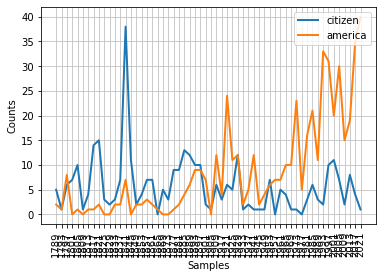

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
import nltk
from nltk.corpus import inaugural

cfd = nltk.ConditionalFreqDist((target, fileid[:4])
for fileid in inaugural.fileids()
for w in inaugural.words(fileid)
for target in ['america', 'citizen']
if w.lower().startswith(target))
cfd.plot()

In [21]:
from nltk.corpus.reader import CategorizedTaggedCorpusReader

creader = CategorizedTaggedCorpusReader('./cn_news_tagged/', '.*',cat_pattern = r'(.+)/.+txt')
it_words = creader.tagged_words(categories=['IT'])
cult_words = creader.tagged_words(categories=['Culture'])
print(len(it_words), len(cult_words))
print(len(set(it_words)), len(set(cult_words)))
def lexical_diversity(text):
    return len(set(text)) / len(text)
print(lexical_diversity(it_words), lexical_diversity(cult_words))

In [ ]:
from nltk.corpus.reader import CategorizedTaggedCorpusReader

creader = CategorizedTaggedCorpusReader('./cn_news_tagged/', '.*',cat_pattern = r'(.+)/.+txt')

from nltk import FreqDist

it_words = creader.words(categories=['IT'])

fdist_it = FreqDist(it_words)

import re

zh_char = re.compile(r'[\u4e00-\u9fa5]')

with open('./stopwords.txt') as f:
    stopwords = f.read().strip().split()
    
domain_stopwords = ['记者', '报道']

cleaned_it_words = filter(lambda item: len(item) > 1 and zh_char.findall(item) and item not in stopwords + domain_stopwords, it_words)

fdist_it = FreqDist(cleaned_it_words)

import matplotlib.pyplot as plt
# 正确显示中文和负号
plt.rcParams["font.sans-serif"] = ["SimHei"] 
plt.rcParams["axes.unicode_minus"] = False
fdist_it.plot(50, cumulative=True, percents=True)